In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

In [3]:
df = pd.read_csv('../logs/training_2018-09-22 12:25:23.132954.log', delimiter=',')
df.head()

,epoch,acc,loss,val_acc,val_loss
0,0,0.018836,0.706315,0.062280,0.356821
1,1,0.162055,0.206955,0.134023,0.189939
2,2,0.372193,0.167090,0.146855,0.185131
3,3,0.419597,0.156696,0.125792,0.168646
4,4,0.182126,0.169581,0.147974,0.165309


# Visualize Loss

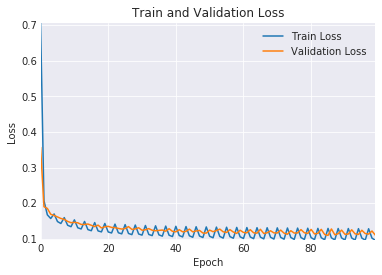

In [6]:
ax = plt.gca()
ax.set_xmargin(0)
ax.set_ymargin(0)
plt.plot(df['epoch'], df['loss'], label="Train Loss")
plt.plot(df['epoch'], df['val_loss'], label="Validation Loss")
plt.legend()
plt.title('Train and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

# Visualize Accuracy

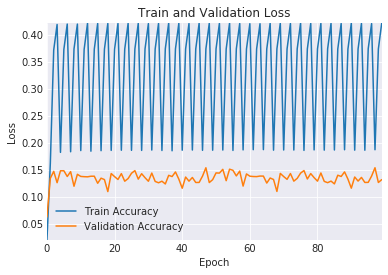

In [7]:
ax = plt.gca()
ax.set_xmargin(0)
ax.set_ymargin(0)
plt.plot(df['epoch'], df['acc'], label="Train Accuracy")
plt.plot(df['epoch'], df['val_acc'], label="Validation Accuracy")
plt.legend()
plt.title('Train and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

[INFO] Loaded model from disk
[INFO] Batch Shape (1, 512, 512, 6)
[INFO] Data Shape (512, 512, 1)
(512, 512)


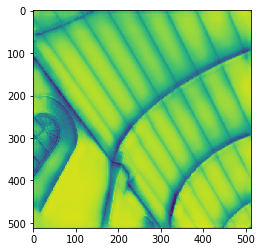

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pyexr
import matplotlib.pyplot as plt

json_file = open('../models/model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = keras.models.model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights('../models/model_2018-09-22 12:25:23.132954.h5')
print("[INFO] Loaded model from disk")
 
# Evaluate loaded model on test data
loaded_model.compile(optimizer=tf.train.AdamOptimizer(0.0001),
              loss='mean_absolute_error',
              metrics=['accuracy'])

normal_image = pyexr.read_all('/media/marcelsantos/StorageDevice/DeepShadingValidationImages/Sibenik/Normals/0000000001.exr')['default'][:,:,0:3]
position_image = pyexr.read_all('/media/marcelsantos/StorageDevice/DeepShadingValidationImages/Sibenik/Position/0000000001.exr')['default'][:,:,0:3]

input_image = np.dstack([normal_image, position_image])

batch = np.expand_dims(input_image, axis=0)

print('[INFO] Batch Shape', batch.shape)

data = loaded_model.predict(batch, 1)[0]

print('[INFO] Data Shape', data.shape)

t = data[:,:,0] 

print(t.shape)

plt.imshow(t)
plt.savefig('test_output.png')
plt.show()

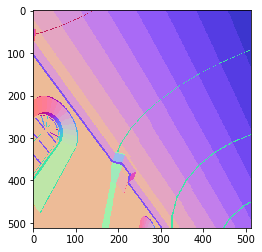

In [4]:
plt.imshow(normal_image)
plt.savefig('normal_input.png')
plt.show()

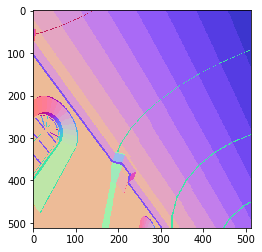

In [5]:
plt.imshow(position_image)
plt.savefig('position_input.png')
plt.show()